## 0.2 Explore data

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Libraries

In [16]:
import janitor
import final_project.utils.paths as path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Read data

In [17]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [19]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255360 entries, 0 to 255359
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  255360 non-null  object
 1   date            255360 non-null  object
 2   value           255360 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [20]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [21]:
sns.set_style("whitegrid")

In [22]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [25]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

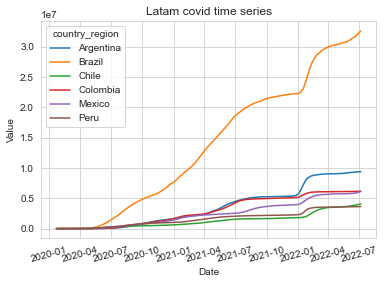

In [27]:
sns.lineplot(
    data=some_latam_countries_df,
    x="date",
    y="value",
    hue="country_region"
)

plt.xticks(rotation=15)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Latam covid time series");

Si el código está listo para producto, es decir, para la entrega final, se ingresa dentro de una función:

In [28]:
def covid_time_series():
    sns.lineplot(
        data=some_latam_countries_df,
        x="date",
        y="value",
        hue="country_region"
    )

    plt.xticks(rotation=15)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Latam covid time series");

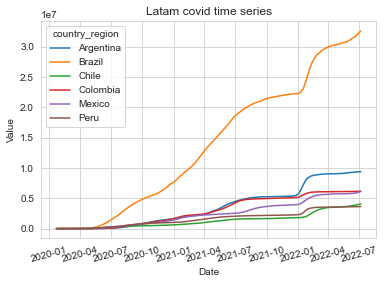

In [29]:
covid_time_series()

Como se pueden tener otros valores diferentes en el `df`, se puede generalizar. Para esto, se asigna una variable a la variable data y se pasa como parámetro de la función:

In [30]:
# DF: covid_df.
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


In [31]:
def covid_time_series(df):
    sns.lineplot(
        data=df,
        x="date",
        y="value",
        hue="country_region"
    )

    plt.xticks(rotation=15)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Latam covid time series");

Ahora se pasa como argumento el df `some_latam_countries_df`:

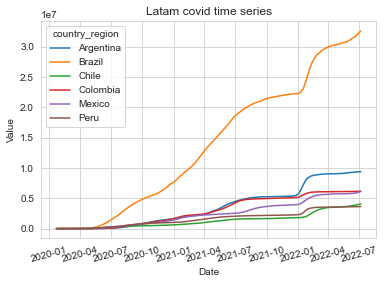

In [32]:
covid_time_series(some_latam_countries_df)

Una vez terminado el producto (la función final), se envía a la respectiva carpeta de visualizaciones. Se procede a importar el módulo con la función:

In [33]:
import final_project.visualization.visualize as visualize

Ahora ya se puede hacer uso del módulo de visualizaciones:

I can modify anything in the function because of the lines: %load_ext autoreload and %autoreload 2


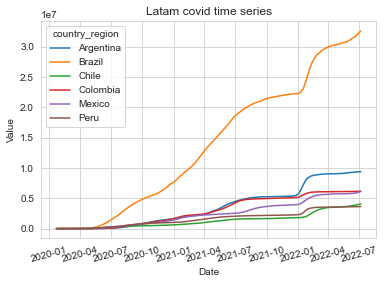

In [34]:
visualize.covid_time_series(some_latam_countries_df)

---

#### Latam in global context

Top `n` countries.

In [35]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

,country_region,value,color
0,US,29691670916,lightblue
1,India,18137201350,lightblue
2,Brazil,12479569726,red
3,France,6962759509,lightblue
4,United Kingdom,6173900717,lightblue


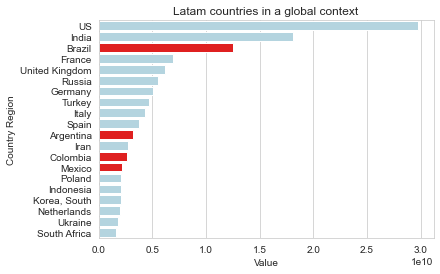

In [36]:
sns.barplot(
    data=top_countries_df,
    x="value",
    y="country_region",
    palette=top_countries_df.color
)

plt.xlabel("Value")
plt.ylabel("Country Region")
plt.title("Latam countries in a global context");

---

### Challenge:
Abstrayendo el código para reutilizarlo como módulo:

In [37]:
def covid_countries_incidences(df_2):
    df_2 = (
        processed_covid_df
        .select_columns(["country_region", "value"])
        .groupby(["country_region"])
        .aggregate("sum")
        .sort_values("value", ascending=False)
        .reset_index()
        .head(20)
        .transform_column(
            column_name="country_region",
            function=lambda x: "red" if x in countries else "lightblue",
            dest_column_name="color"
        )
    )

    sns.barplot(
        data=df_2,
        x="value",
        y="country_region",
        palette=df_2.color
    )

    plt.xlabel("Value")
    plt.ylabel("Country Region")
    plt.title("Latam countries in a global context");

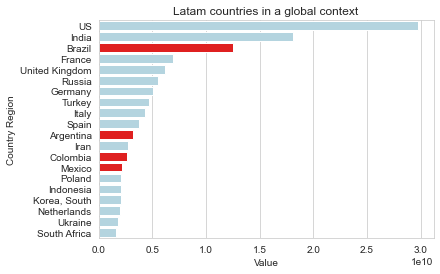

In [38]:
covid_countries_incidences(top_countries_df)

Se agregó al archivo `visualize.py` y se importó: 

In [39]:
import final_project.visualization.visualize as visualize

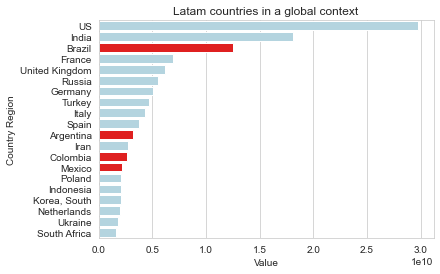

In [40]:
visualize.covid_countries_incidences(top_countries_df, countries, processed_covid_df)